In [1]:
# Demosntrate AO star Algorithm with Visualization
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# AO* algorithm function
def ao_star(node, graph, heuristic, solved):
    if node in solved:
        return heuristic[node], [node]

    if not graph[node]:  # Goal node
        solved.add(node)
        return heuristic[node], [node]

    min_cost = float('inf')
    best_path = []

    for child, relation in graph[node]:
        if relation == 'OR':
            cost, path = ao_star(child, graph, heuristic, solved)
            if cost < min_cost:
                min_cost = cost
                best_path = [node] + path
        elif relation == 'AND':
            cost1, path1 = ao_star(child, graph, heuristic, solved)
            siblings = [s for s, r in graph[node] if r == 'AND' and s != child]
            total_cost = cost1
            total_path = [node] + path1
            for sib in siblings:
                cost2, path2 = ao_star(sib, graph, heuristic, solved)
                total_cost += cost2
                total_path += path2
            if total_cost < min_cost:
                min_cost = total_cost
                best_path = total_path

    heuristic[node] = min_cost
    solved.add(node)
    return min_cost, best_path

In [3]:
graph = {
    'A' : [('B', 'OR'), ('C', 'AND'), ('D', 'AND')],
    'B' : [('E', 'OR'), ('F', 'OR')],  
    'C' : [('G', 'OR'), ('H', 'AND'), ('I', 'AND')],
    'D' : [('J', 'OR')],
    'E' : [],
    'F' : [],   
    'G' : [],
    'H' : [],
    'I' : [],
    'J' : []
}


heuristic = {
    'A': 0,
    'B': 5,
    'C': 3,
    'D': 4,
    'E': 10,
    'F': 11,
    'G': 3,
    'H': 0,
    'I': 0,
    'J': 1
}


In [4]:
# Run AO* from the Start node
solved_nodes = set()
cost, optimal_path = ao_star('A', graph, heuristic, solved_nodes)

# Output the optimal path and cost
print("Optimal Path:", " -> ".join(optimal_path))
print("Total Cost:", cost)

Optimal Path: A -> C -> H -> I -> D -> J
Total Cost: 1


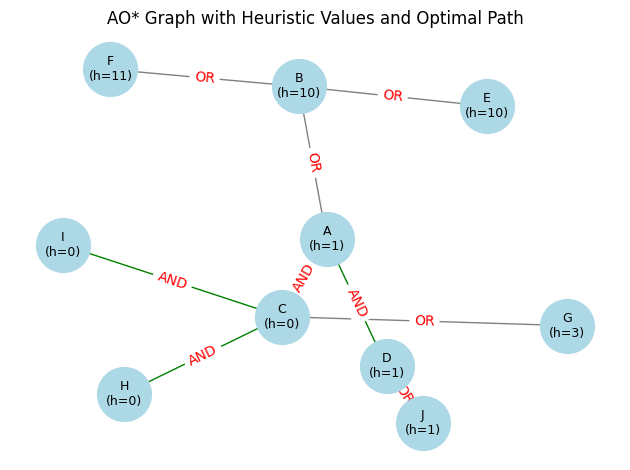

In [6]:
# Visualize the graph
G = nx.DiGraph()

# Add nodes with heuristic values
for node in graph:
    G.add_node(node, heuristic=heuristic[node])

# Add edges with labels
for u in graph:
    for v, relation in graph[u]:
        G.add_edge(u, v, label=relation)

# Draw the graph
pos = nx.spring_layout(G, seed=42)
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=1500)
node_labels = {node: f"{node}\n(h={data['heuristic']})" for node, data in G.nodes(data=True)}
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=9)

# Draw edges with labels and highlight optimal path
edge_colors = []
for u, v, data in G.edges(data=True):
    # Highlight edge if both nodes are in optimal_path and u comes before v
    if u in optimal_path and v in optimal_path and optimal_path.index(u) < optimal_path.index(v):
        edge_colors.append('green')
    else:
        edge_colors.append('gray')

nx.draw_networkx_edges(G, pos, edge_color=edge_colors, arrows=True)
edge_labels = {(u, v): data['label'] for u, v, data in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

plt.title("AO* Graph with Heuristic Values and Optimal Path")
plt.axis('off')
plt.tight_layout()
plt.show()
